In [5]:
import os
import cv2
import sys
import shutil
import random
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [6]:
path = 'at&t faces/'
images = []

In [7]:
m = 92                                                                      # number of columns of the image
n = 112                                                                     # number of rows of the image
mn = m * n 
## her l is totl no. of images
l = 400
L = np.empty(shape=(mn, l), dtype='float64')
total_subjects = 40

In [8]:
curr_img = 0
for j in range(1, total_subjects+1):
    path = 'at&t faces/'
    path = os.path.join(path, 's'+str(j)+'/')
    for i in range(1,11):
        path_to_img = os.path.join(path, str(i)+'.pgm')
        #print(path_to_img)
        img = cv2.imread(path_to_img, 0)
        images.append(img)
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_arr = np.array(img, dtype='float64').flatten()
        L[:, curr_img] = img_arr[:]
        curr_img += 1
        #plt.imshow(img)
        #plt.title('my picture')
        #plt.show()
        

In [5]:
# every image is a column here 
L.shape

(10304, 400)

In [6]:
def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

In [7]:
len(images)

400

In [9]:
images[5].shape

(112, 92)

In [26]:
len(images[:])

240

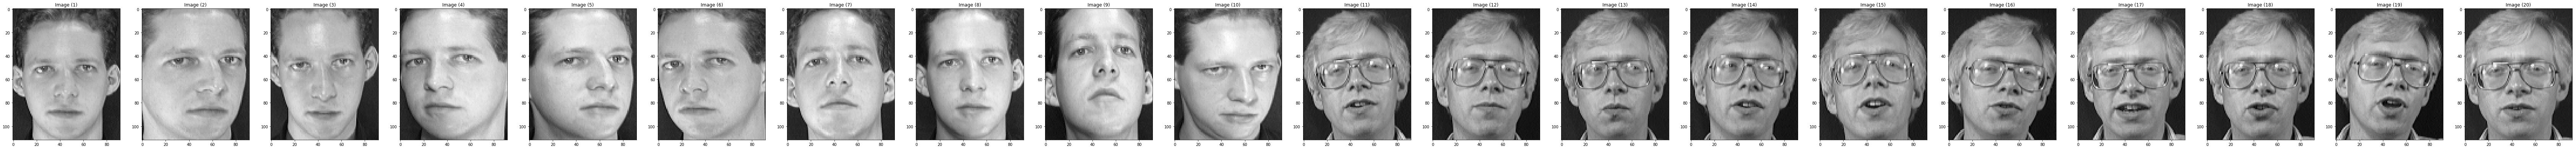

In [12]:
show_images(images[:20])

In [18]:
# use opposite of flatten to show reverse 

array([[48., 60., 39., ..., 44., 42., 34.],
       [49., 60., 44., ..., 43., 41., 34.],
       [45., 62., 53., ..., 32., 44., 33.],
       ...,
       [47., 32., 29., ..., 43., 42., 37.],
       [46., 34., 26., ..., 43., 43., 40.],
       [46., 34., 29., ..., 37., 41., 33.]])

In [39]:
L.shape

(10304, 10)

In [33]:
L1 = []
for i in range(20):
    L1.append(L[:,i])

In [3]:
#plt.imshow(L[:,125].reshape(112, 92))

In [43]:
L[:,1].shape

(10304,)

In [4]:
#plt.imshow(L[:,0].reshape(112,92))

In [13]:
mean_img_col = np.sum(L, axis=1) / l

In [14]:
mean_img_col.shape

(10304,)

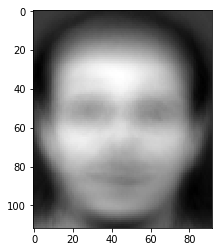

In [15]:
plt.imshow(mean_img_col.reshape(112,92))

In [16]:
for j in xrange(0, l):                                             # subtract from all training images
    L[:, j] -= mean_img_col[:]

In [17]:
L.shape

(10304, 400)

In [18]:
L1 = []
for i in range(20):
    L1.append(L[:,i].reshape((112, 92)))

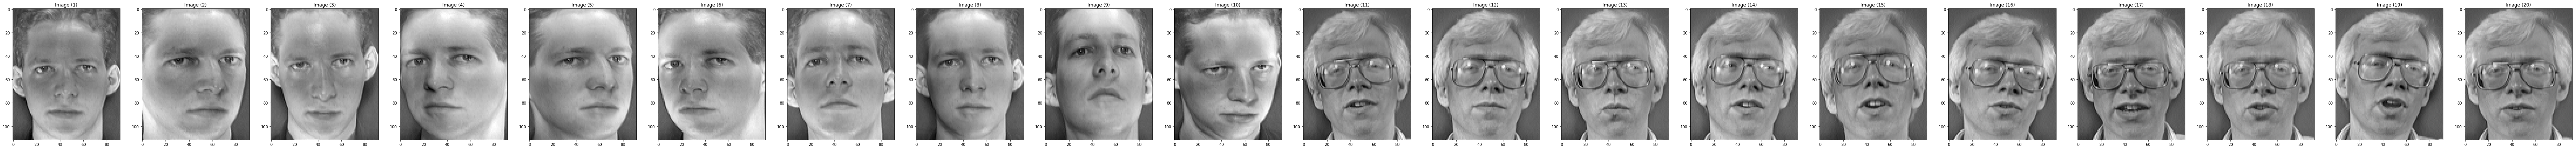

In [19]:
show_images(L1)

In [82]:
L1[1].shape

(112, 92)

In [ ]:
show_images(L1)

In [20]:
C = np.matrix(L.transpose()) * np.matrix(L)

In [21]:
C /= l

In [22]:
C.shape

(400, 400)

In [2]:
#C

In [1]:
#np.linalg.eig(C)

In [24]:
evalues, evectors = np.linalg.eig(C) 

In [25]:
evectors.shape

(400, 400)

In [26]:
sort_indices = evalues.argsort()[::-1]

In [27]:
evalues = evalues[sort_indices]
evectors = evectors[sort_indices]

In [28]:
evalues_sum = sum(evalues[:])

In [29]:
evalues_count = 0 
evalues_energy = 0.0

In [30]:
## comparing energy here 
energy = 0.95

In [31]:
for evalue in evalues:
            evalues_count += 1
            evalues_energy += evalue / evalues_sum

            if evalues_energy >= energy:
                break

In [32]:
evalues_count

190

In [33]:
evalues = evalues[0:evalues_count]
evectors = evectors[0:evalues_count]

In [34]:
evectors = evectors.transpose()

In [35]:
evectors.shape

(400, 190)

In [36]:
evectors = L * evectors

In [37]:
evectors.shape

(10304, 190)

In [38]:
#### showing eigenfaces for 6 training examples out of 10
eigen_faces = []
for i in range (20):
    eigen_faces.append(evectors[:,i].reshape(112,92))

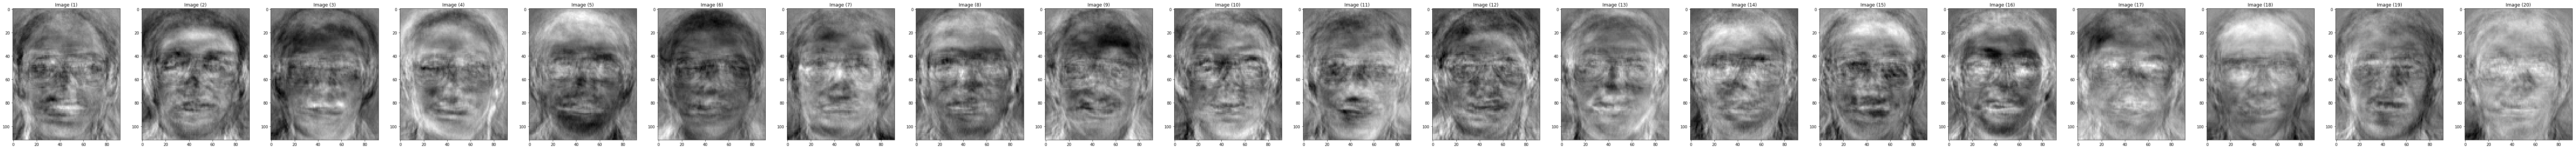

In [39]:
show_images(eigen_faces)

In [40]:
norms = np.linalg.norm(evectors, axis=0) 

In [42]:
evectors = evectors / norms

In [43]:
W = evectors.transpose() * L

In [44]:
## weights are having size of same as top k eigens that too  for every image
W.shape

(190, 400)